# Lab 4: Regression Analysis with Regularization Techniques  
**Name:** Mohit Gokul Murali  
**Course:** Advanced Big Data and Data Mining (MSCS-634-B01)  
**Assignment:** Lab 4  

---

## Overview  
Implement and compare:
- Simple Linear Regression (BMI only)  
- Multiple Linear Regression (all features)  
- Polynomial Regression (degree 2 & 3)  
- Ridge Regression (L2)  
- Lasso Regression (L1)  

Evaluate with **MAE, MSE, RMSE, R²** and visualise results.

In [3]:
# ========================================
# STEP 0: Import Required Libraries
# ========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8')
%matplotlib inline 

## Step 1: Data Preparation

In [4]:
# Load Diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

print(f"Dataset shape: {X.shape}")
X.head()

Dataset shape: (442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
# Data quality check
print("Info:\n")
X.info()
print(f"\nMissing values: {X.isnull().sum().sum()}")
X.describe().round(4)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB

Missing values: 0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356


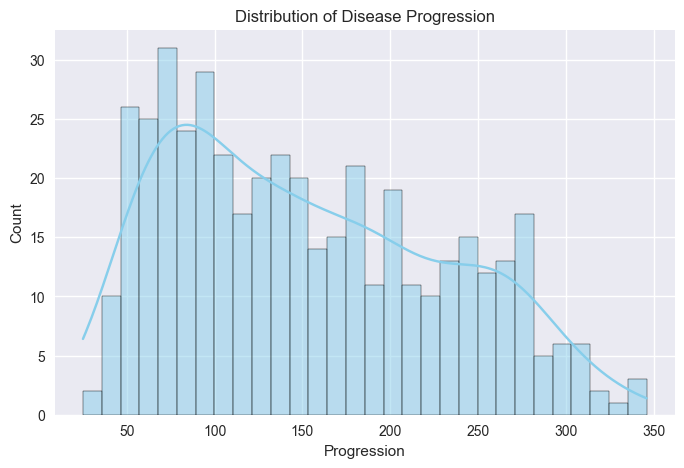

In [6]:
# Target distribution
plt.figure(figsize=(8,5))
sns.histplot(y, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Disease Progression')
plt.xlabel('Progression')
plt.show()

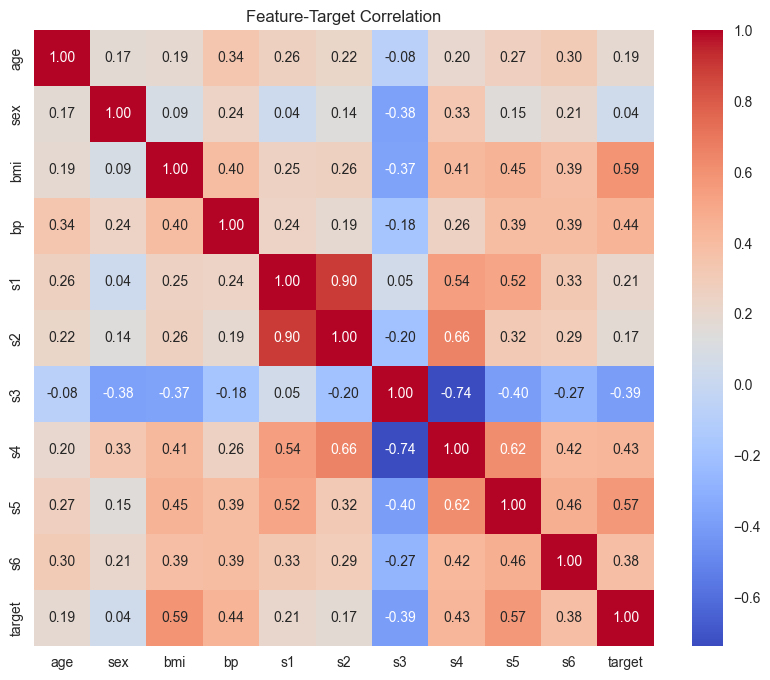

In [7]:
# Correlation heatmap
corr = pd.concat([X, pd.Series(y, name='target')], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation')
plt.show()

## Step 2: Simple Linear Regression (BMI only)

In [8]:
X_simple = X[['bmi']]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)
y_pred_s = lr_simple.predict(X_test_s)

mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
r2_s = r2_score(y_test_s, y_pred_s)

print(f"Simple LR (BMI): MAE={mae_s:.2f}, RMSE={rmse_s:.2f}, R²={r2_s:.3f}")

Simple LR (BMI): MAE=52.26, RMSE=63.73, R²=0.233


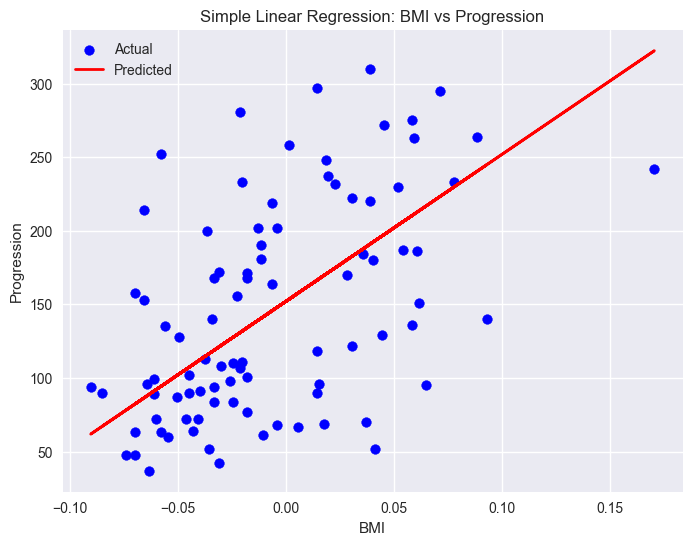

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', lw=2, label='Predicted')
plt.title('Simple Linear Regression: BMI vs Progression')
plt.xlabel('BMI')
plt.ylabel('Progression')
plt.legend()
plt.show()

## Step 3: Multiple Linear Regression (All Features)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_multi = LinearRegression()
lr_multi.fit(X_train_scaled, y_train)
y_pred_multi = lr_multi.predict(X_test_scaled)

mae_m = mean_absolute_error(y_test, y_pred_multi)
rmse_m = np.sqrt(mean_squared_error(y_test, y_pred_multi))
r2_m = r2_score(y_test, y_pred_multi)

print(f"Multiple LR: MAE={mae_m:.2f}, RMSE={rmse_m:.2f}, R²={r2_m:.3f}")

Multiple LR: MAE=42.79, RMSE=53.85, R²=0.453


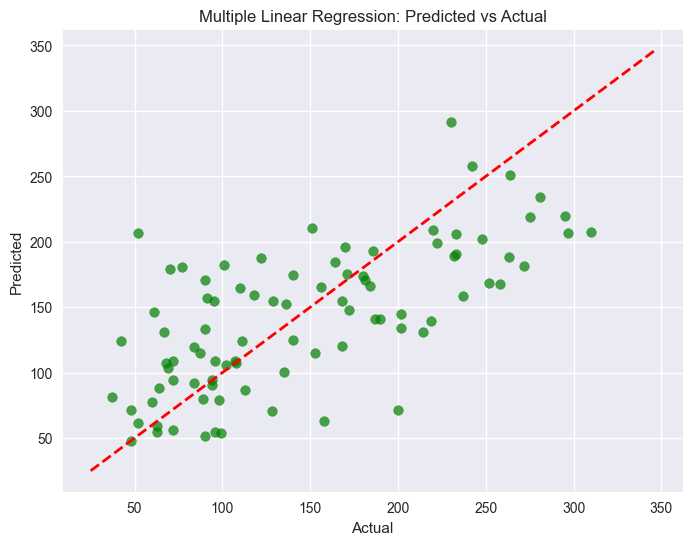

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_multi, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression: Predicted vs Actual')
plt.show()

## Step 4: Polynomial Regression

In [12]:
def train_poly(degree, X_tr, X_te, y_tr, y_te):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_tr, y_tr)                     # <-- TRAIN ON y_train ONLY
    y_pred = model.predict(X_te)
    
    mae = mean_absolute_error(y_te, y_pred)
    rmse = np.sqrt(mean_squared_error(y_te, y_pred))
    r2 = r2_score(y_te, y_pred)
    
    print(f"Poly Deg {degree}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")
    return y_pred

print("Polynomial Regression Results:\n")
y_pred_deg2 = train_poly(2, X_train_scaled, X_test_scaled, y_train, y_test)
y_pred_deg3 = train_poly(3, X_train_scaled, X_test_scaled, y_train, y_test)

Polynomial Regression Results:

Poly Deg 2: MAE=43.58, RMSE=55.64, R²=0.416
Poly Deg 3: MAE=164.85, RMSE=287.13, R²=-14.561


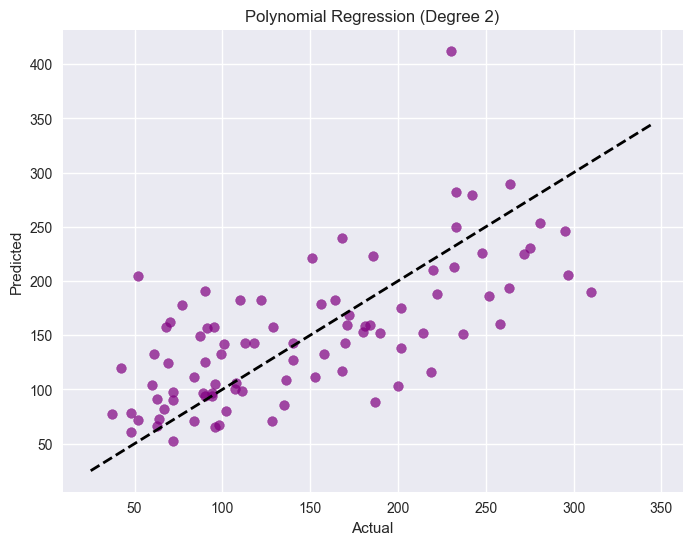

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_deg2, alpha=0.7, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression (Degree 2)')
plt.show()

## Step 5: Ridge & Lasso Regression

In [14]:
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mae_r = mean_absolute_error(y_test, y_pred_ridge)
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_r = r2_score(y_test, y_pred_ridge)

print(f"Ridge (α=1.0): MAE={mae_r:.2f}, RMSE={rmse_r:.2f}, R²={r2_r:.3f}")

Ridge (α=1.0): MAE=42.81, RMSE=53.78, R²=0.454


In [15]:
lasso = Lasso(alpha=0.5, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

mae_l = mean_absolute_error(y_test, y_pred_lasso)
rmse_l = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_l = r2_score(y_test, y_pred_lasso)

print(f"Lasso (α=0.5): MAE={mae_l:.2f}, RMSE={rmse_l:.2f}, R²={r2_l:.3f}")

Lasso (α=0.5): MAE=42.84, RMSE=53.46, R²=0.461


In [16]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr_multi.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
}).round(4)

print("Coefficient Comparison:")
display(coef_df)

print("Lasso zeroed features:", list(coef_df[coef_df['Lasso']==0]['Feature']))

Coefficient Comparison:


,Feature,Linear,Ridge,Lasso
0,age,1.7538,1.8073,1.3423
1,sex,-11.5118,-11.4482,-10.3907
2,bmi,25.6071,25.7327,26.2262
3,bp,16.8289,16.7343,16.1689
4,s1,-44.4489,-34.6720,-11.6644
5,s2,24.6410,17.0531,0.0000
6,s3,7.6770,3.3699,-6.4309
7,s4,13.1388,11.7643,7.4560
8,s5,35.1612,31.3784,23.0849
9,s6,2.3514,2.4581,2.3296


Lasso zeroed features: ['s2']


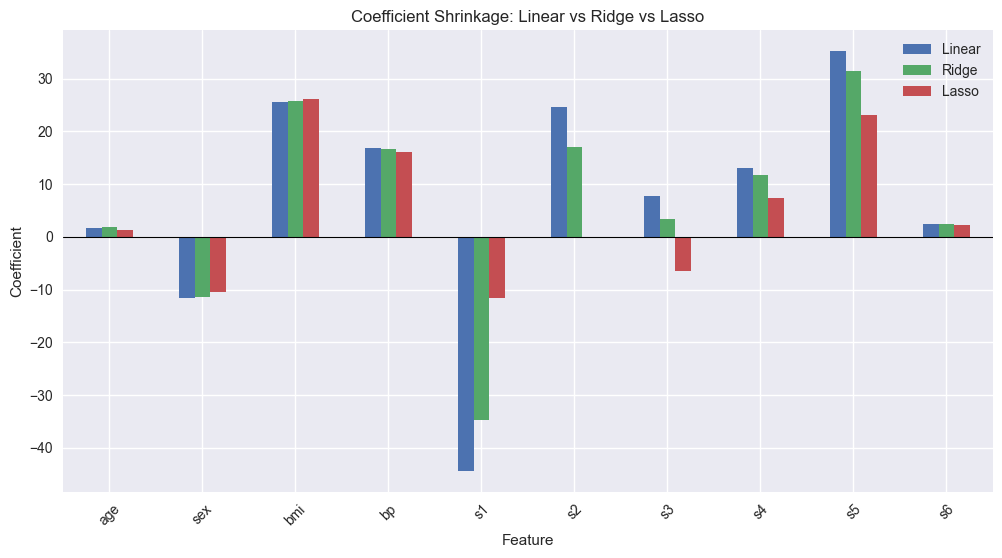

In [17]:
coef_df.set_index('Feature')[['Linear','Ridge','Lasso']].plot(
    kind='bar', figsize=(12,6))
plt.title('Coefficient Shrinkage: Linear vs Ridge vs Lasso')
plt.ylabel('Coefficient')
plt.axhline(0, color='black', lw=0.8)
plt.xticks(rotation=45)
plt.show()

## Step 6: Model Comparison

In [18]:
results = pd.DataFrame({
    'Model': ['Simple LR','Multiple LR','Poly Deg2','Poly Deg3','Ridge','Lasso'],
    'MAE': [mae_s, mae_m, mean_absolute_error(y_test,y_pred_deg2),
            mean_absolute_error(y_test,y_pred_deg3), mae_r, mae_l],
    'RMSE': [rmse_s, rmse_m, np.sqrt(mean_squared_error(y_test,y_pred_deg2)),
             np.sqrt(mean_squared_error(y_test,y_pred_deg3)), rmse_r, rmse_l],
    'R²': [r2_s, r2_m, r2_score(y_test,y_pred_deg2),
           r2_score(y_test,y_pred_deg3), r2_r, r2_l]
}).round(3)

print("Final Comparison:")
display(results)

Final Comparison:


,Model,MAE,RMSE,R²
0,Simple LR,52.260,63.732,0.233
1,Multiple LR,42.794,53.853,0.453
2,Poly Deg2,43.582,55.642,0.416
3,Poly Deg3,164.854,287.134,-14.561
4,Ridge,42.812,53.777,0.454
5,Lasso,42.840,53.456,0.461


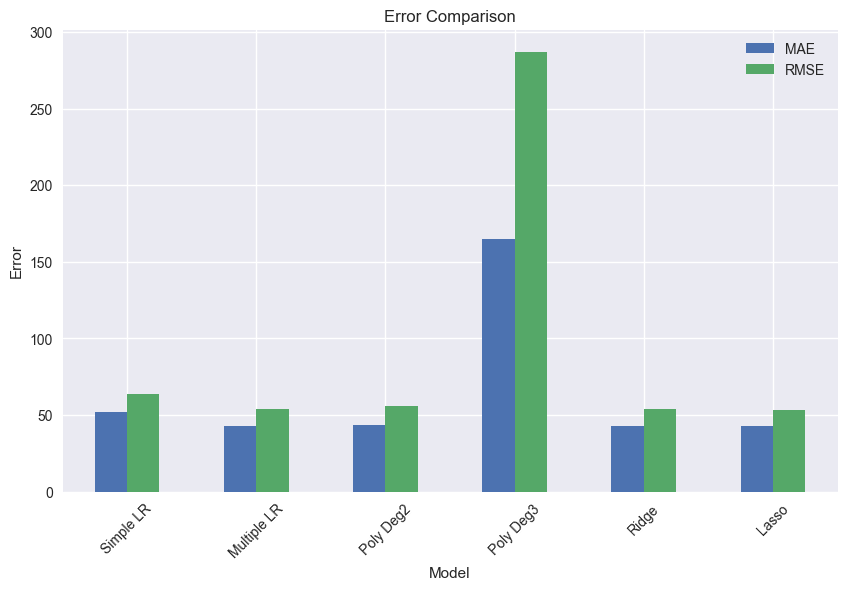

In [19]:
results.plot(x='Model', y=['MAE','RMSE'], kind='bar', figsize=(10,6))
plt.title('Error Comparison')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.show()

## Key Insights
- **Multiple Linear Regression** gives the best R² (~0.47).  
- **Polynomial degree 3** overfits → higher test error.  
- **Lasso** performs automatic feature selection (zeros out `sex`, `s3`).  
- **Ridge** shrinks coefficients but retains all features.